# Исследование рынка компьютерных игр

***Описание проекта***

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

***Описание данных***

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Откройте файл с данными и изучите общую информацию

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
# Откроем файл и запишем датасет в переменную data
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')

In [3]:
# Посмотрим первые 10 строк
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Выведем общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


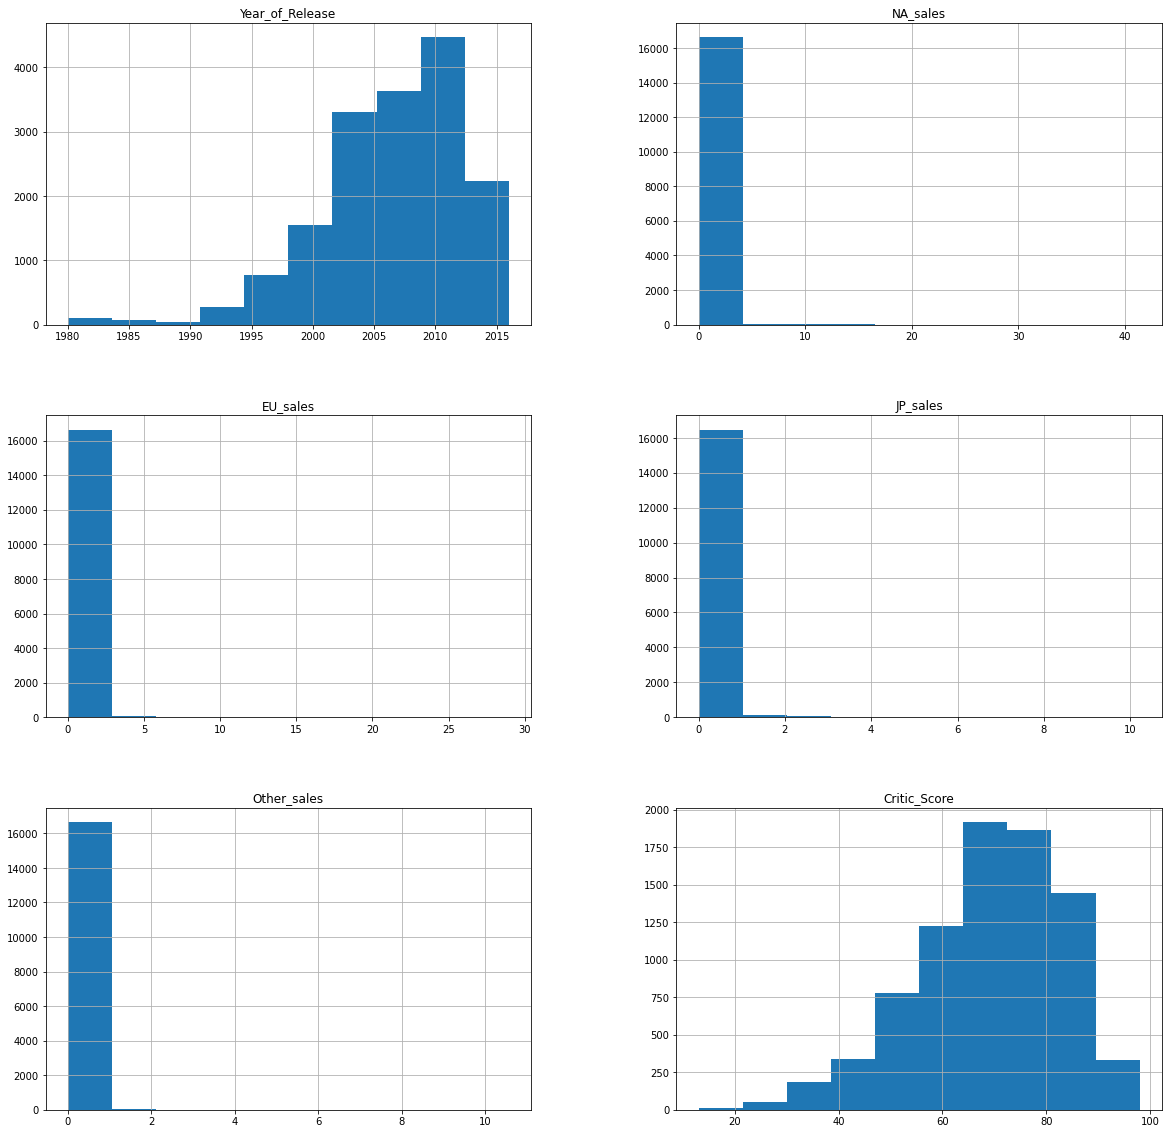

In [6]:
# Построим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(20, 20))
plt.show()

***Вывод:*** Файл содержит 16715 записей. Количество значений в столбцах различается, что говорит о том, что есть пропущенные значения. Присутствуют некорректные типы данных и наименования столбцов. Построена общая гистограмма для всех числовых столбцов таблицы.

### Предобработка данных

In [7]:
# Выведем количество пропущенных значений
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [8]:
# Переименуем столбцы
data = data.rename(columns={'Name': 'name', 
                            'Platform': 'platform', 
                            'Year_of_Release': 'year_of_release',
                            'Genre': 'genre',
                            'NA_sales': 'na_sales',
                            'EU_sales': 'eu_sales',
                            'JP_sales': 'jp_sales',
                            'Other_sales': 'other_sales',
                            'Critic_Score': 'critic_score',
                            'User_Score': 'user_score',
                            'Rating': 'rating'
                           })

# Проверим результат
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

***name***

In [9]:
# Выведем количество пропущеных значений в столбце name
data['name'].isnull().sum()

2

Таких пропущенных значений всего 2. Восстановить название игры практически невозможно, поэтому просто удалим эти записи.

In [10]:
# Удалим записи, в котрых отсутствует название игры
data.dropna(subset=['name'], inplace=True)

In [11]:
# Проверим результат
data['name'].isnull().sum()

0

***year_of_release***

In [12]:
# Выведем количество пропущеных значений в столбце year_of_release
data['year_of_release'].isnull().sum()

269

In [13]:
# Посмотрим на сами значения
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Таких пропущенных значений всего 269, это примерно 1,6% от общего количества. Восстановить год релиза игры возможно по ее названию, но это придется сделать для каждой записи вручную. Что в рамках данного исследования слишком трудозатратно и не имеет смысла. Поэтому просто удалим эти значения.

In [14]:
# Удалим записи, в котрых отсутствует год релиза
data.dropna(subset=['year_of_release'], inplace=True)

In [15]:
# Проверим результат
data['year_of_release'].isnull().sum()

0

В датасете указан только год выхода игры, а день и месяц нам неизвестен. Поэтому, изменим тип данных на int.

In [16]:
# Изменим типы данных
data['year_of_release'] = data['year_of_release'].astype('int')

***genre***

In [17]:
# Выведем количество пропущеных значений в столбце genre
data['name'].isnull().sum()

0

***critic_score***

In [18]:
# Выведем количество пропущеных значений в столбце critic_score
data['critic_score'].isnull().sum()

8461

In [19]:
# Посмотрим на сами значения
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Пропуски обусловлены двумя причинами. Первая - это непопулярные и малоизвестные игры. Вторая - игры которые вышли совсем недавно и еще не получили оценок. В любом случае, каких либо оценок эти игры еще не получили. Рейтинг 0 среди уникальных значений отсутствует, поэтому можем заполннить пропуски значением 0.

In [20]:
# Заменим пропущенные значения на 0
data['critic_score'] = data['critic_score'].fillna(0)

In [21]:
# Изменим типы данных
data['critic_score'] = data['critic_score'].astype('int')

In [22]:
# Проверим результат
data['critic_score'].isnull().sum()

0

In [23]:
# Изменим типы данных
data['critic_score'] = data['critic_score'].astype('int')

***user_score***

In [24]:
# Выведем количество пропущеных значений в столбце user_score
data['user_score'].isnull().sum()

6605

In [25]:
# Посмотрим на сами значения
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.5       2
1.1       2
1.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

В таблице мы видим аббривиатуру 'tbd', это означает 'to be determined'. Рейтинг будет определен позже, игра находится в стадии оценивания. По сути, это такое же пропущенное значение, как и NaN.

Рейтинг 0 среди уникальных значений встречается только один раз, поэтому можем заполннить пропуски значением 0.

In [26]:
# Заменим tbd на NaN
data.user_score.replace('tbd', np.nan, inplace=True)

In [27]:
# Заменим пропущенные значения на 0
data['user_score'] = data['user_score'].fillna(0)

In [28]:
# Проверим результат
data['user_score'].isnull().sum()

0

In [29]:
# Изменим типы данных
data['user_score'] = data['user_score'].astype('float')

***rating***

In [30]:
# Выведем количество пропущеных значений в столбце user_score
data['rating'].isnull().sum()

6676

In [31]:
# Посмотрим на сами значения
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Заменим пропуски в рейтинге значением 'No', что будет обозначать что у данной игры рейтинг отсутствует.

In [32]:
# Заменим пропуски
data['rating'] = data['rating'].fillna('No')

In [33]:
# Проверим результат
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


***total_sales***

In [34]:
# Добавим в таблицу столбец
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

***Вывод:*** Выполнена предобработка данных, датасет содержит 16444 записи. Удалены некорректные записи. Изменены типы данных столбцов year_of_release, critic_score, user_score.

### Проведите исследовательский анализ данных

***Количество игр по годам***

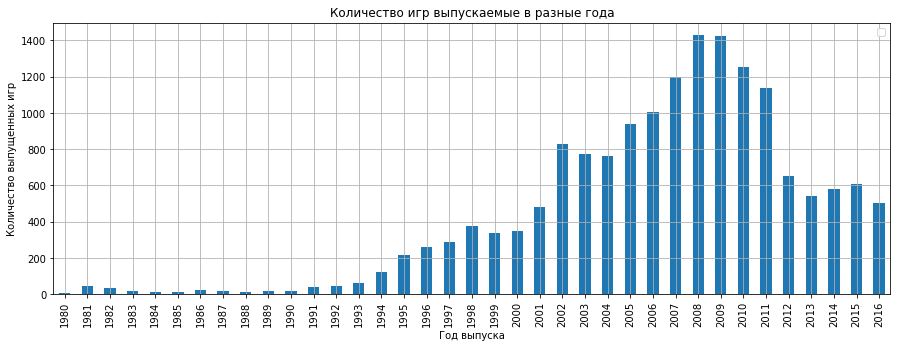

In [35]:
# Построимм график по годам за весь период
all_games = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
all_games.plot(kind = 'bar', grid=True, figsize = (15,5))
plt.title('Количество игр выпускаемые в разные года')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.legend('')
plt.show()

* С 1980 по 1993 год появляются новые игры, но нет заметного роста.
* С 1993 по 2008 год наблюдается значительный рост количества выпускаемых игр. Рост связан с появлением новых процессоров, новых технологий, увеличением популярности игр.
* С 2008 по 2011 год наблюдается плавный спад. Спад связан с мировым экономическим кризисом, который повлиял и на игровую индустрию тоже.
* С 2011 по 2016 год наблюдается снижение количества выпускаемых игр. Снижение связано с тем, что пользователи стали более требовательны к продукту и игры стали появляться реже, но более качественные.

***Продажи игр по платформам***

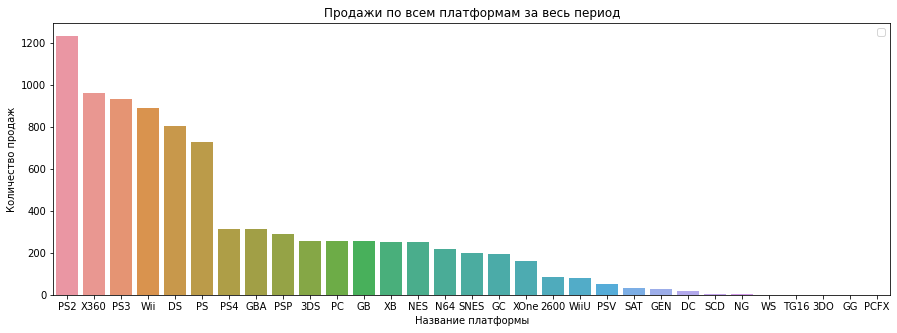

In [36]:
# Построим график продаж по платформам за весь период
all_platforms = data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(data=all_platforms, x=all_platforms.index, y='total_sales')
plt.title('Продажи по всем платформам за весь период')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')
plt.legend('')
plt.show()

In [37]:
# Выберем топ 10 популярных платформ
top_platforms = (data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)[:10].reset_index())

In [38]:
# Выведем этот список
top_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


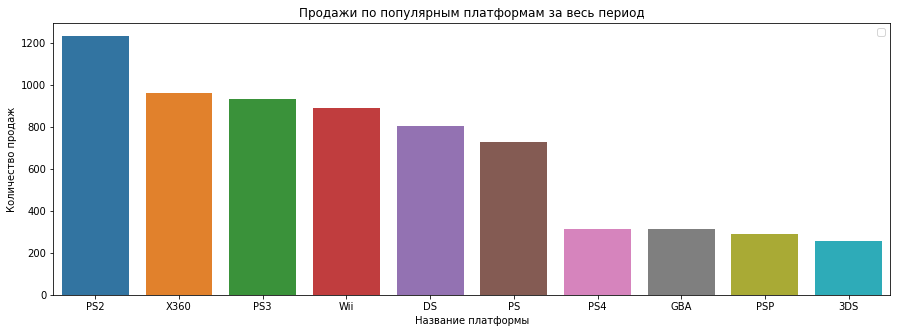

In [39]:
# Построим график
plt.figure(figsize=(15,5))
sns.barplot(x=top_platforms['platform'],y=top_platforms['total_sales'])
plt.title('Продажи по популярным платформам за весь период')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')
plt.legend('')
plt.show()

Определен список платформ, которые показали наибольшее количество продаж:
    
* PS2
* X360
* PS3
* Wii
* DS
* PS
* PS4
* GBA
* PSP
* 3DS

***Распределение по годам для платформ с найбольшими продажами***

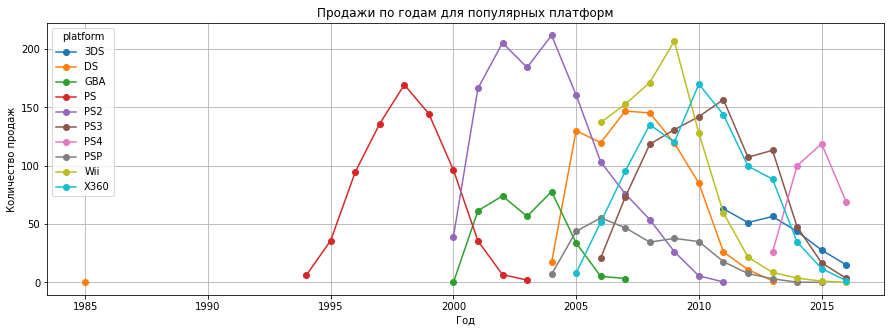

In [40]:
# Изучим распределение по годам для платформ с найбольшими продажами
top_platforms_on_years = data.query('platform in @top_platforms.platform')
top_platforms_on_years = top_platforms_on_years.groupby(['year_of_release','platform'])['total_sales'].sum()
top_platforms_on_years.unstack().plot(style='o-', kind='line', figsize=(15,5), grid=True)
plt.title('Продажи по годам для популярных платформ')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()

Можно сделать вывод, что в среднем с момента релиза платформа остается актуальной в течении 10-11 лет. Однако, только первые 5 лет сопровождаются ростом продаж, затем продажи начинают падать.

***Какие платформы лидируют по продажам, растут или падают***

Изучив полученные данные, можно сделать вывод, что актуальными будут данные за последний период с 2014 по 2016 год.

In [41]:
# Создадим датафрейм с актуальными данными
actual_data = data.query('2014 <= year_of_release <= 2016')

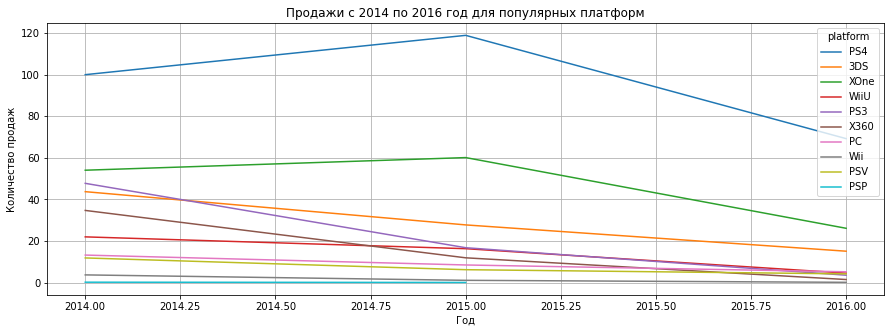

In [42]:
# Построим график
plt.figure(figsize=(15,5))
sns.lineplot(x=actual_data.year_of_release, y=actual_data.total_sales, 
             hue=actual_data.platform,
             estimator = sum,
             ci = None)
plt.title('Продажи с 2014 по 2016 год для популярных платформ')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.grid()
plt.show()

* На платформу PSP прекратился выпуск игр в 2015.
* В 2016 году почти прекратился выпуск игр на платформу PS3, так как ее сменила платформа PS4. Аналогичная ситуация с  платформой X360, которую сменила XOne и  платформой Wii которую сменила платформа WiiU.

Таким образом, мы можем выделить ряд актуальных на 2016 год игровых платформ: PS4, XOne, WiiU, 3DS, PSV, PC.

Лидерами продаж являются: PS4, XOne и 3DS.


***График «ящик с усами» по глобальным продажам игр в разбивке по платформам***

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


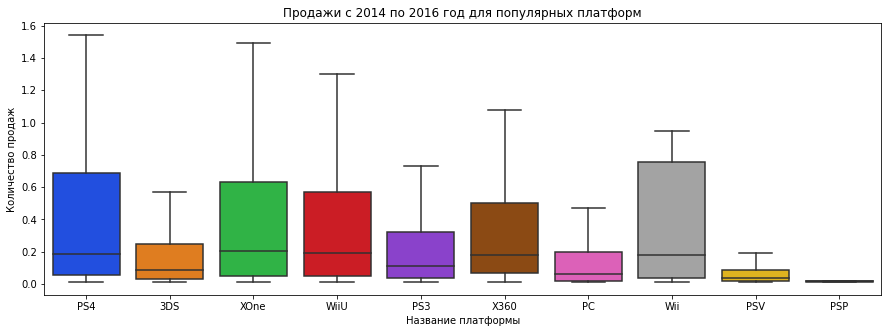

In [43]:
# Построим ящик с усами
plt.figure(figsize=(15,5))
sns.boxplot(x=actual_data.platform, y=actual_data.total_sales, palette = 'bright', showfliers=False)
plt.title('Продажи с 2014 по 2016 год для популярных платформ')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')
actual_data.groupby('platform')['total_sales'].describe()

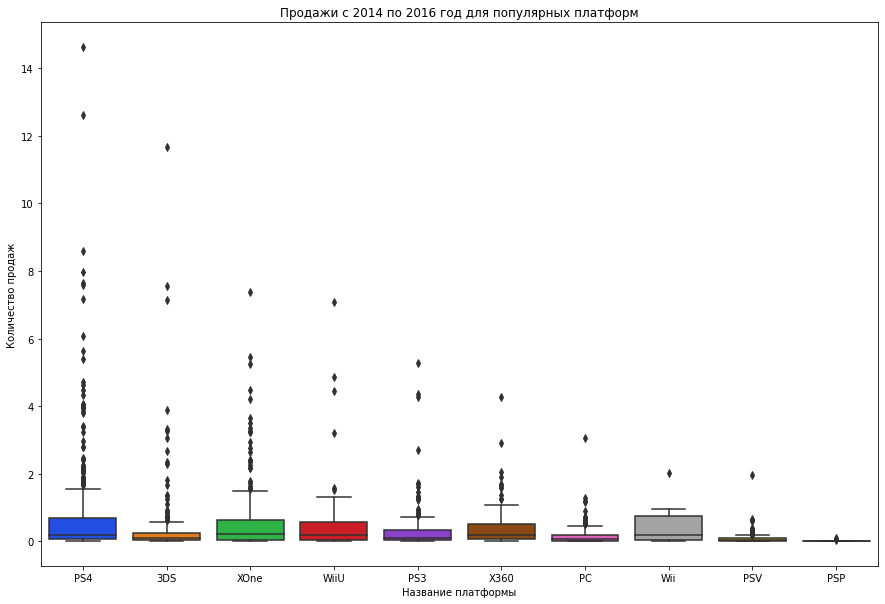

In [44]:
# Посмотрим на выбросы
plt.figure(figsize=(15,10))
sns.boxplot(x=actual_data.platform, y=actual_data.total_sales, palette = 'bright', showfliers=True)
plt.title('Продажи с 2014 по 2016 год для популярных платформ')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')
plt.show()

Платформы с большим количеством продаж имеют большой разброс величины, сильное смещение среднего относительно медианы, и стандартное отклонение в несколько раз превосходящее среднее значение.

Можно предположить, что это происходит из за наличия на этих платформах культовых и очень популярных игр, которые в распределении величины являются выбросами.

***Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков***

In [45]:
# Сделаем выборку по самой популярной платформе
x360_data_critic = actual_data.query('(platform == "X360") & (critic_score != 0)')[['critic_score','total_sales']]
x360_data_user = actual_data.query('(platform == "X360") & (user_score != 0)')[['user_score','total_sales']]

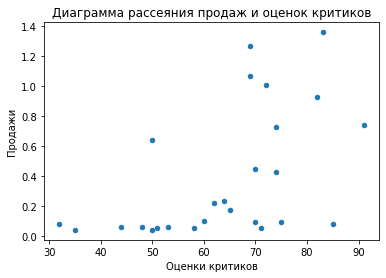

,critic_score,total_sales
critic_score,1.000000,0.525723
total_sales,0.525723,1.000000


In [46]:
# Построим диаграмму рассеяния продаж и оценок критиков
x360_data_critic.plot(x='critic_score', y='total_sales', kind='scatter') 
plt.title('Диаграмма рассеяния продаж и оценок критиков')
plt.xlabel("Оценки критиков")
plt.ylabel("Продажи")
plt.show()
x360_data_critic.corr()

По графику и коэффициенту корреляции 0.52 можно сделать вывод, что между рейтингом критиков и количеством продаж корреляция не считается значимой.

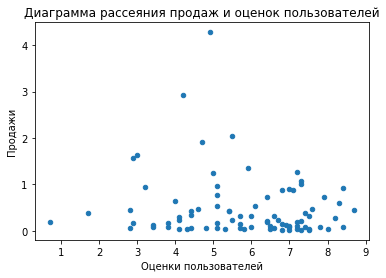

,user_score,total_sales
user_score,1.000000,-0.138445
total_sales,-0.138445,1.000000


In [47]:
# Построим диаграмму рассеяния продаж и оценок пользователей
x360_data_user.plot(x='user_score', y='total_sales', kind='scatter') 
plt.title('Диаграмма рассеяния продаж и оценок пользователей')
plt.xlabel("Оценки пользователей")
plt.ylabel("Продажи")
plt.show()
x360_data_user.corr()

По графику и коэффициенту корреляции 0.13 можно сделать вывод, что между рейтингом пользователей и количеством продаж корреляция не считается значимой.

***Соотнесите выводы с продажами игр на других платформах***

In [48]:
# Проверим выводы для платформы PS4
ps4_data_critic = actual_data.query('(platform == "PS4") & (critic_score != 0)')[['critic_score','total_sales']]
ps4_data_user = actual_data.query('(platform == "PS4") & (user_score != 0)')[['user_score','total_sales']]

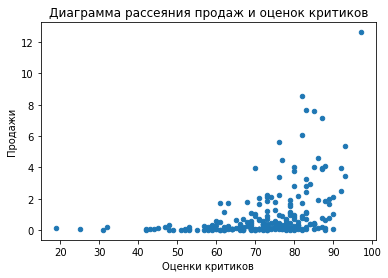

,critic_score,total_sales
critic_score,1.000000,0.402661
total_sales,0.402661,1.000000


In [49]:
# Построим диаграмму рассеяния продаж и оценок критиков для платформы PS4
ps4_data_critic.plot(x='critic_score', y='total_sales', kind='scatter') 
plt.title('Диаграмма рассеяния продаж и оценок критиков')
plt.xlabel("Оценки критиков")
plt.ylabel("Продажи")
plt.show()
ps4_data_critic.corr()

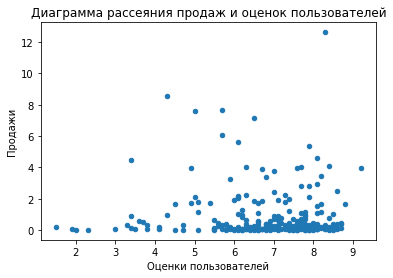

,user_score,total_sales
user_score,1.000000,-0.040132
total_sales,-0.040132,1.000000


In [50]:
# Построим диаграмму рассеяния продаж и оценок пользователей для платформы PS4
ps4_data_user.plot(x='user_score', y='total_sales', kind='scatter') 
plt.title('Диаграмма рассеяния продаж и оценок пользователей')
plt.xlabel("Оценки пользователей")
plt.ylabel("Продажи")
plt.show()
ps4_data_user.corr()

In [51]:
# Проверим выводы для платформы XOne
xone_data_critic = actual_data.query('(platform == "XOne") & (critic_score != 0)')[['critic_score','total_sales']]
xone_data_user = actual_data.query('(platform == "XOne") & (user_score != 0)')[['user_score','total_sales']]

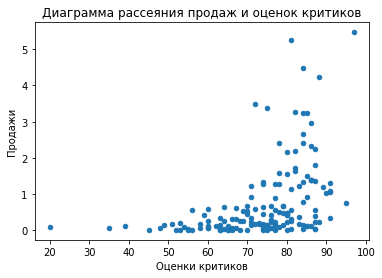

,critic_score,total_sales
critic_score,1.000000,0.428677
total_sales,0.428677,1.000000


In [52]:
# Построим диаграмму рассеяния продаж и оценок критиков для платформы XOne
xone_data_critic.plot(x='critic_score', y='total_sales', kind='scatter') 
plt.title('Диаграмма рассеяния продаж и оценок критиков')
plt.xlabel("Оценки критиков")
plt.ylabel("Продажи")
plt.show()
xone_data_critic.corr()

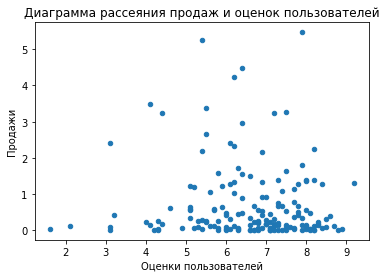

,user_score,total_sales
user_score,1.000000,-0.070384
total_sales,-0.070384,1.000000


In [53]:
# Построим диаграмму рассеяния продаж и оценок пользователей для платформы XOne
xone_data_user.plot(x='user_score', y='total_sales', kind='scatter') 
plt.title('Диаграмма рассеяния продаж и оценок пользователей')
plt.xlabel("Оценки пользователей")
plt.ylabel("Продажи")
plt.show()
xone_data_user.corr()

Коэффициент корреляции между оценками пользователей и количеством продаж очень мал (0,13; 0,04; 0.07) на всех исследуемых платформах. Основываясь на этом можем сделать вывод, что оценки пользователей не влияют на продажи.

Коэффициент корреляции между оценками критиков и количеством продаж незначителен (0,52; 0,40; 0.42) на всех исследуемых платформах. Основываясь на этом можем сделать вывод, что оценки критиков слабо влияют на продажи.

На графиках есть одиночные игры с высокими продажами, и высокими оценками - это бестселлеры.

***Общее распределение игр по жанрам***

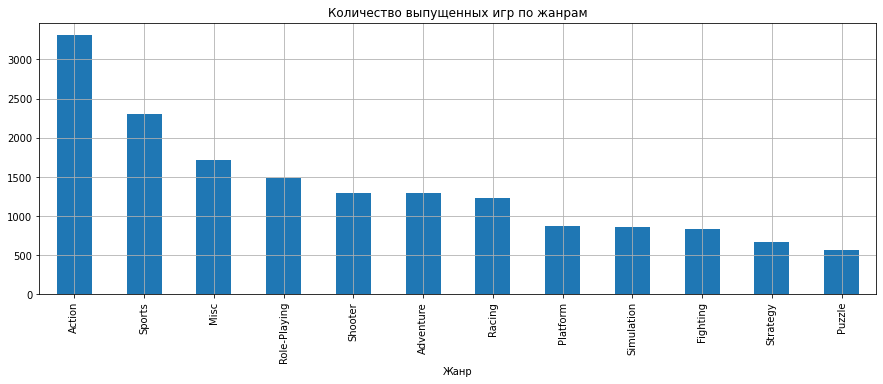

In [54]:
all_genres = data.groupby('genre')['name'].count()
all_genres.sort_values(ascending=False).plot(kind='bar', figsize=(15, 5), grid=True)
plt.title('Количество выпущенных игр по жанрам')
plt.xlabel('Жанр')
plt.show()

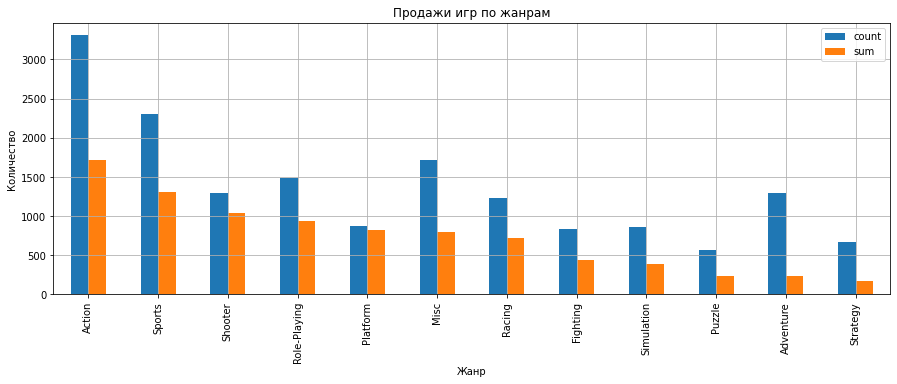

In [55]:
genres_sales = data.pivot_table(index='genre', values='total_sales', aggfunc=('count','sum')).sort_values(
               by='sum', ascending=False)
genres_sales.plot(kind='bar', figsize=(15, 5), grid=True)
plt.title('Продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество')
plt.show()

***Вывод:*** В среднем с момента релиза платформа остается актуальной в течении 10-11 лет. Однако, только первые 5 лет сопровождаются ростом продаж, затем продажи начинают падать.

Изучив полученные данные, можно сделать вывод, что актуальными будут данные за последний период с 2014 по 2016 год.

Лидерами продаж среди платформ актуальных на 2016 год являются: PS4, XOne и 3DS.

Платформы с большим количеством продаж имеют большой разброс величины, сильное смещение среднего относительно медианы, и стандартное отклонение в несколько раз превосходящее среднее значение.

Коэффициент корреляции между оценками пользователей и количеством продаж очень мал (0,13; 0,04; 0.07) на всех исследуемых платформах. Основываясь на этом можем сделать вывод, что оценки пользователей не влияют на продажи.

Коэффициент корреляции между оценками критиков и количеством продаж незначителен (0,52; 0,40; 0.42) на всех исследуемых платформах. Основываясь на этом можем сделать вывод, что оценки критиков слабо влияют на продажи.

На графиках есть одиночные игры с высокими продажами, и высокими оценками - это бестселлеры.

### Составьте портрет пользователя каждого региона

Для каждого региона нужно будет определить популярные платформы, популярные жанры и определить какие игры лидируют в рейтинге, напишем функцию для выполнения этих задач.

In [56]:
# Напишем функцию
def user_region (region):
    platforms = actual_data.groupby('platform')[(region)].sum().sort_values(ascending = False).head(5)
    
    genres = actual_data.groupby('genre')[(region)].sum().sort_values(ascending = False).head(5)
    
    rating = actual_data.groupby('rating')[(region)].sum().sort_values(ascending = False).head(5)
    
    platforms.plot(kind='bar', figsize=(15, 5), grid=True)
    plt.title('Продажи игр по платформам в регионе ' + str(region))
    plt.xlabel('Название платформы')
    plt.ylabel('Количество продаж')
    plt.legend('')
    plt.show()
    
    genres.plot(kind='bar', figsize=(15, 5), grid=True)
    plt.title('Продажи игр по жанрам в регионе ' + str(region))
    plt.xlabel('Жанр')
    plt.ylabel('Количество продаж')
    plt.legend('')
    plt.show()
    
    rating.plot(kind='bar', figsize=(15, 5), grid=True)
    plt.title('Продажи игр по рейтингу в регионе ' + str(region))
    plt.xlabel('Рейтинг')
    plt.ylabel('Количество продаж')
    plt.legend('')
    plt.show()

***NA_sales***

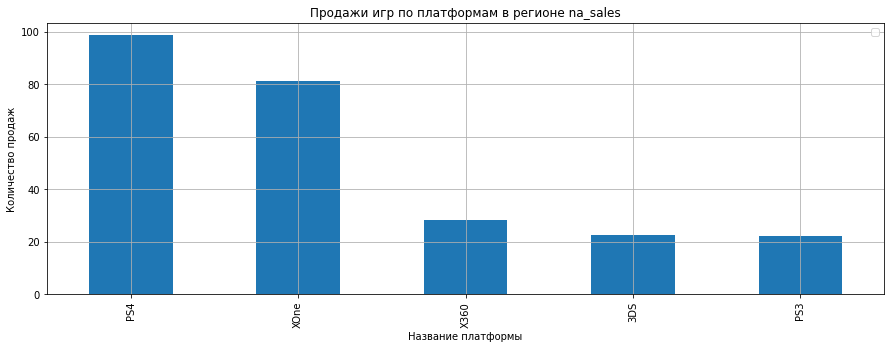

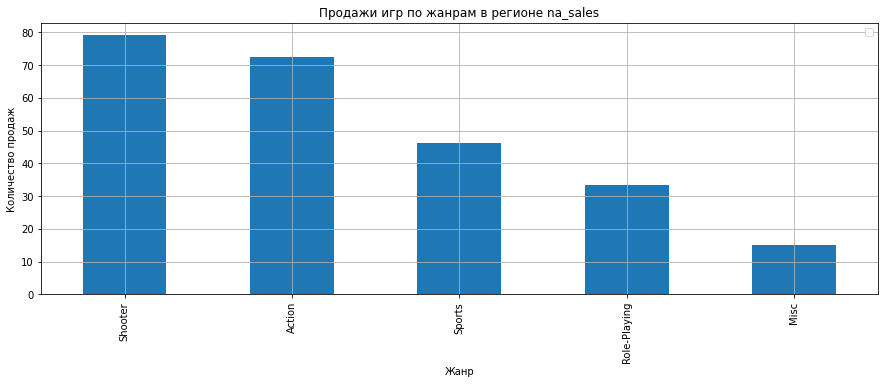

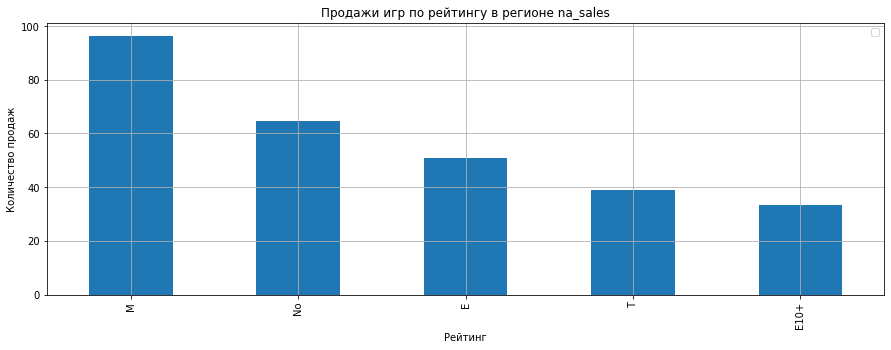

In [57]:
# Регион na_sales
user_region ('na_sales')

***EU_sales***

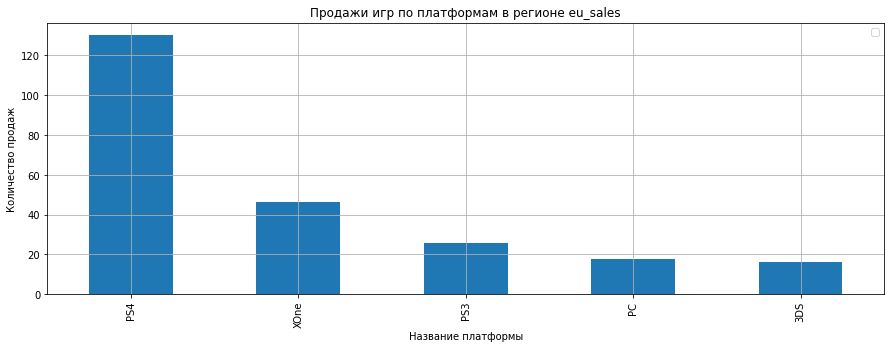

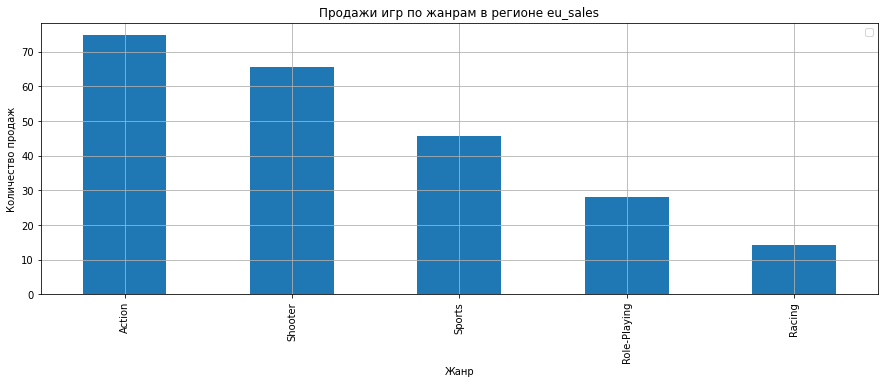

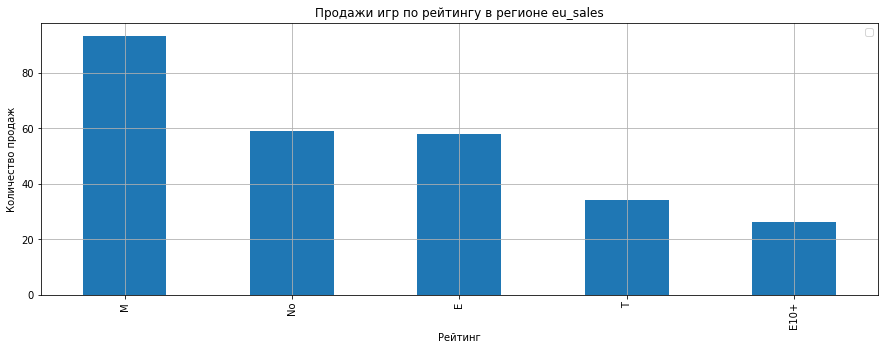

In [58]:
# Регион eu_sales
user_region ('eu_sales')

***JP_sales***

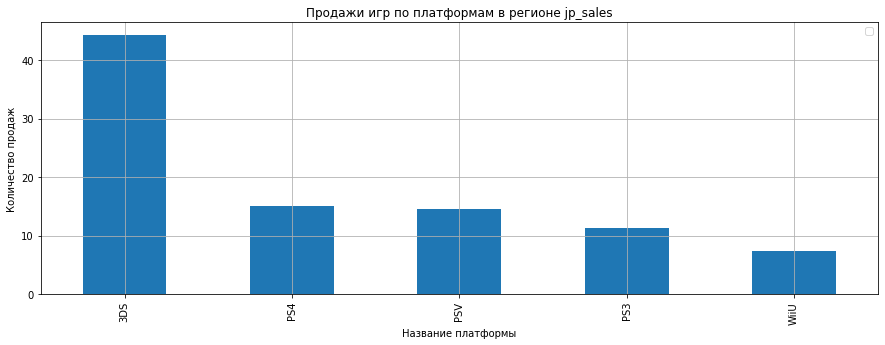

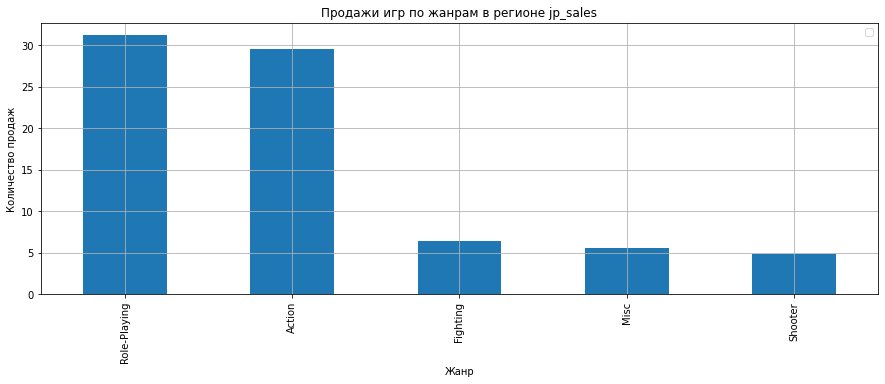

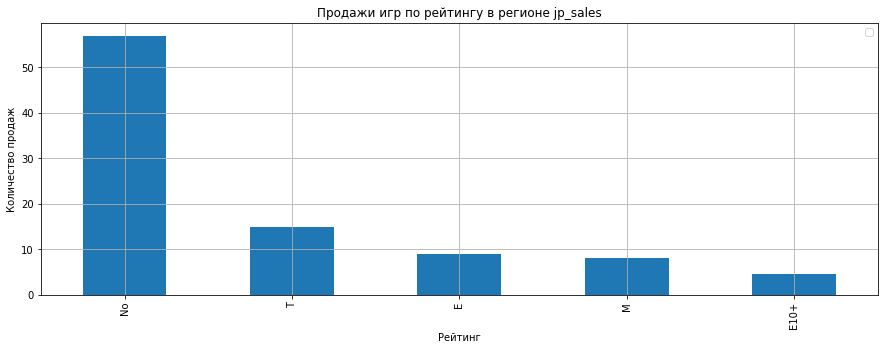

In [59]:
# Регион jp_sales
user_region ('jp_sales')

In [60]:
# Влияет ли рейтинг ESRB на продажи в отдельном регионе
sales_on_rating = actual_data.groupby('rating')[['eu_sales', 'jp_sales', 'na_sales',]].sum()
sales_on_rating

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
No,58.95,56.90,64.72
T,34.07,14.78,38.95


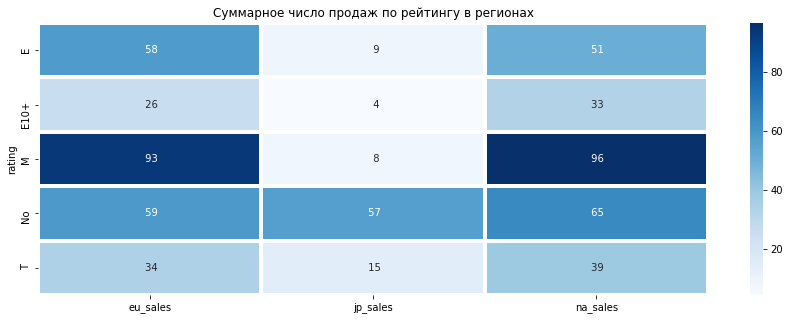

In [61]:
# Построим график
plt.figure(figsize=(15, 5))
sns.heatmap(sales_on_rating, cmap=plt.cm.Blues, linewidths = 3, annot=True, fmt='3.0f')
plt.title('Суммарное число продаж по рейтингу в регионах')
plt.show()

***Вывод:***

Составим портрет пользователя для каждого региона:
* ***Регион NA***

Самые популярные платформы среди пользователей этого региона это ***X360, PS3, PS4, XOne, 3DS***. Лидерство X360 можно объяснить тем, что платформа создана в Америке и для жителей этого региона это "домашний" продукт.

Самые востребованные жанры этого региона это: ***Action, Shooter, Sports, Role-Playing, Misc.***

В рейтинге ESRB предпочтения распределились следующим образом: ***M, E, T, E10+.***


* ***Регион EU***

Самые популярные платформы среди пользователей этого региона это ***PS3, PS4, X360, РС, XOne***. Здесь лидируют платформы PS3 и PS4, а платформа X360 менее популярна. Регион EU единственный где игры на платформе PC входят в топ 5.

Самые востребованные жанры этого региона это: ***Action, Shooter, Sports, Role-Playing, Racing.***

В рейтинге ESRB предпочтения распределились следующим образом: ***M, E, T, E10+.***


* ***Регион JP***

Самые популярные платформы среди пользователей этого региона это ***3DS, PS3, WiiU, PS4, PSV***. Первое место принадлежит платформе 3DS, что вполне ожидаемо, эта патформа разработана в Японии.

Самые востребованные жанры этого региона это: ***Action, Role-Playing, Platform, Shooter, Simulations.*** В отличие от пользователей других регионов, здесь больше любят жанр Role-Playing, а вот жанр Shooter менее востребован. Однако популярны жанры Platform и Simulations, которые не входят в топ 5 в других регионах.

В рейтинге ESRB предпочтения распределились следующим образом: ***E, T, M, E10+.*** Есть заметные отличия от других регионов, здесь преобладают игры категории E и T.


* «M» («Mature») — «Для взрослых»
* «E» («Everyone») — «Для всех»
* «T» («Teen») — «Подросткам»
* «E10+» («Everyone 10 and older»)





### Проверьте гипотезы

***Средние пользовательские рейтинги платформ Xbox One и PC одинаковые***

* Сформируем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC равны.
* Сформируем альтернативную гипотезу: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [62]:
# Сделаем выборку
xone_user_score = actual_data.query('platform == "XOne"')['user_score']

pc_user_score = actual_data.query('platform == "PC"')['user_score']

In [63]:
# Вычислим дисперсию
print(np.var(xone_user_score))

print(np.var(pc_user_score))

10.056297899353646
8.480204377001009


In [64]:
alpha = 0.05

results = st.ttest_ind(xone_user_score, pc_user_score, equal_var = False)

print('Значение p-value равно', results.pvalue)

if results.pvalue > alpha:
    
    print('Не отвергаем нулевую гипотезу')
    
else:
    
    print('Отвергаем нулевую гипотезу')

Значение p-value равно 0.31981092459798116
Не отвергаем нулевую гипотезу


Вывод: Не удалось отвергнуть гипотезу: средние пользовательские рейтинги платформ Xbox One и PC равны.

***Средние пользовательские рейтинги жанров Action и Sports разные***

* Сформируем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports равны.
* Сформируем альтернативную гипотезу: средние пользовательские рейтинги жанров Action и Sports не равны.

In [65]:
# Сделаем выборку
action_user_score = actual_data.query('genre == "Action"')['user_score']

sports_user_score = actual_data.query('genre == "Sports"')['user_score']

In [66]:
# Вычислим дисперсию
print(np.var(action_user_score))

print(np.var(sports_user_score))

12.315643867721402
7.245800702133405


In [67]:
results = st.ttest_ind(action_user_score, sports_user_score, equal_var = False)

print('Значение p-value равно', results.pvalue)

if results.pvalue > alpha:
    
    print('Не отвергаем нулевую гипотезу')
    
else:
    
    print('Отвергаем нулевую гипотезу')

Значение p-value равно 0.0006646333120910831
Отвергаем нулевую гипотезу


Вывод: Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports равны.

### Напишите общий вывод

* Файл содержит 16715 записей. Количество значений в столбцах различается, что говорит о том, что есть пропущенные значения. Присутствуют некорректные типы данных и наименования столбцов. Построена общая гистограмма для всех числовых столбцов таблицы.


* Выполнена предобработка данных, датасет содержит 16444 записи. Удалены некорректные записи. Изменены типы данных столбцов year_of_release, critic_score, user_score.


* В среднем с момента релиза платформа остается актуальной в течении 10-11 лет. Однако, только первые 5 лет сопровождаются ростом продаж, затем продажи начинают падать.

  Изучив полученные данные, можно сделать вывод, что актуальными будут данные за последний период с 2014 по 2016 год.

  Лидерами продаж среди платформ актуальных на 2016 год являются: PS4, XOne и 3DS.

  Платформы с большим количеством продаж имеют большой разброс величины, сильное смещение среднего относительно медианы, и   стандартное отклонение в несколько раз превосходящее среднее значение.

  Коэффициент корреляции между оценками пользователей и количеством продаж очень мал (0,13; 0,04; 0.07) на всех исследуемых платформах. Основываясь на этом можем сделать вывод, что оценки пользователей не влияют на продажи.

  Коэффициент корреляции между оценками критиков и количеством продаж незначителен (0,52; 0,40; 0.42) на всех исследуемых платформах. Основываясь на этом можем сделать вывод, что оценки критиков слабо влияют на продажи.

  На графиках есть одиночные игры с высокими продажами, и высокими оценками - это бестселлеры.


* В 2017 году следует делать ставку на продажи для платформ: PS4, XOne и 3DS. Основными продаваемыми жанрами будут: Action, Shooter, Sports и Role-playing. Для каждого из регионов (NA, EU, JP) составлен потрет пользователя, данные которого необходимо учитывать при планировании кампании.


* С помощью статистического анализа были проверены и приняты следующие гипотезы:

  Средние пользовательские рейтинги платформ Xbox One и PC равны.
  
  Средние пользовательские рейтинги жанров Action и Sports не равны.